# Problem Set 1: Rate Laws

## Part A: Plotting data and determining the order of a rate law

### A1: First order rate laws
### Reaction in question: $A \rightarrow X$
### with first order rate law: $-\frac{d[A]}{dt} = k[A]$

### a)
#### Making a plot of $[A](t)$  vs.  $t$

In [249]:
import numpy as np
from numpy import linspace
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sympy as sp
from sympy import symbols, Function, diff, Eq, dsolve, lambdify, solve
from scipy.integrate import quad, solve_ivp
from IPython.display import display, Math

In [250]:
def first_rate_law(A0, k, t=np.linspace(0, 10, 100), error=0.01):
    c_A = A0*np.exp(-k*t) #concentration of A (solution to the first order rate law)
    
    #lets find the half-life
    #analytical
    time_analytic = np.log(2) / k
    
    #numerical 
    for time in t:
        c_A_time = A0*np.exp(-k*time)
        if ((A0/2)-error) < c_A_time <= ((A0/2)+error): #we need to make a margin for error
            time_numeric = time
            c_A_numeric = c_A_time
            break
    if 'c_A_numeric' not in locals():
        print("Could not find solution. Consider increasing your")
        print("margin for error or increasing num component in t.")
        return
    
    #plotting
    title = "k = " + str(k)
    plt.scatter(time, c_A_numeric, c="red")
    plt.scatter(time_analytic, A0/2, c="green")
    plt.text(time, c_A_time, "numeric", fontsize=10, ha='left', va='bottom')
    plt.text(time_analytic, A0/2, "analytical", fontsize=10, ha='left', va='top')        
    plt.title(title); plt.xlabel("$time(s)$"); plt.ylabel("$[A]$") #plt.plot(t, c_A, label="analytical"); 
    return plt.plot(t, c_A, label="analytical")

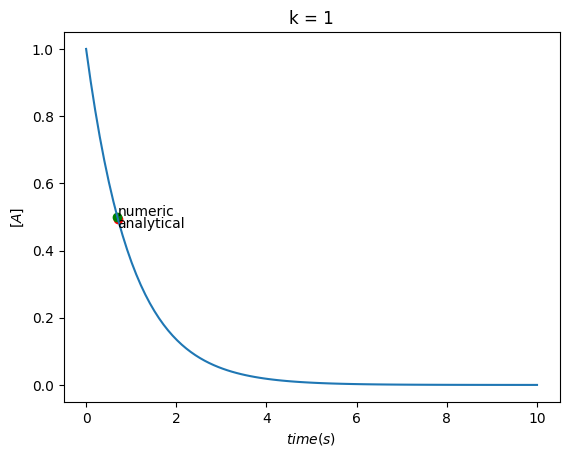

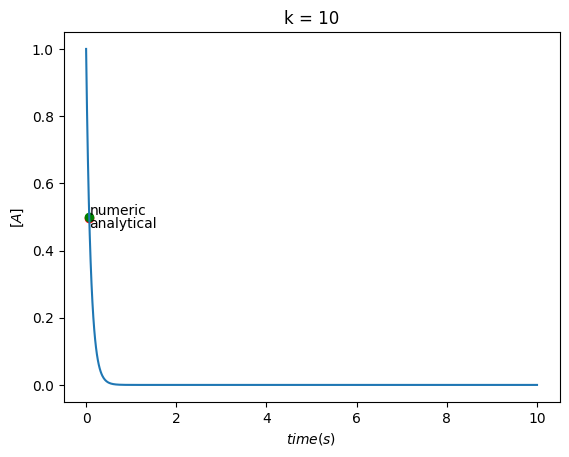

In [251]:
#constants
A0=1
k=[1, 10]
first_rate_law(A0, k[0]);plt.show(); first_rate_law(A0, k[1], np.linspace(0,10,1000));plt.show()

##### From these graphs, it seems that the expression provided for half-life is consistent with the numerical values.

### b)

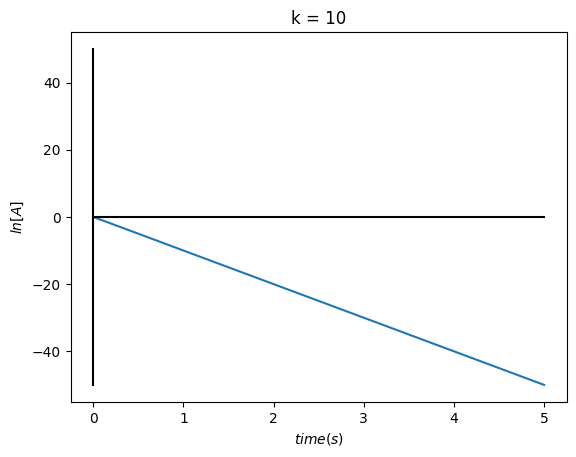

In [252]:
#constants
k=10
A0=1

#plot values
y_axis=np.linspace(-50,50)
range= [0]*50
t = np.linspace(0, 5, num=1000)
log_c_A = -(k*t) + np.log(A0)
x_axis = t*0

#plotting
plt.plot(t, log_c_A)
plt.plot(t, x_axis, c="black")
plt.plot(range, y_axis, c="black")
plt.title("k = 10"); plt.xlabel("$time(s)$"); plt.ylabel("$ln[A]$"); plt.show()

##### Here we see that the slope of this function is the negative of our k-value. The y-intercept is influenced by the $A_0$ value. At $A_0$ = 1, the line passes through the origin. At $A_0$ < 1 the y-intercept is negative and opposite is true for $A_0$ > 1.   

## A2: Second order rate laws
### $2A \rightarrow X$
### $-\frac{d[A]}{dt}=k[A]^2$
### a) and b)

0.25925925925925924
5.714285714285714


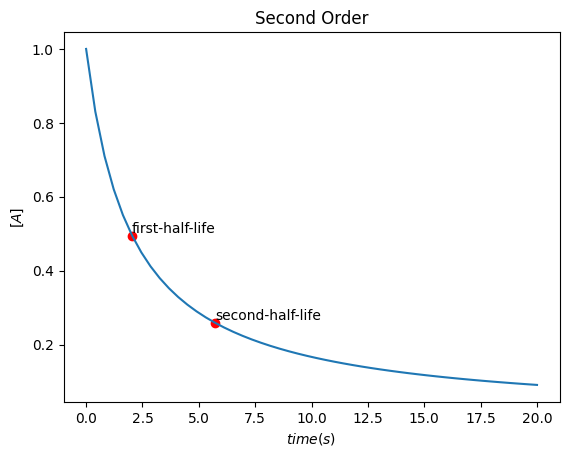

In [253]:
#constants
A0=1
k=0.5

t = np.linspace(0,20)
c_A = (A0)/((k*t*A0)+1)

#numerical
#first half-life
for time in t:
    c_A_time = (A0)/((k*time*A0)+1)
    if ((A0/2)-0.01) < c_A_time <= ((A0/2)+0.01): #we need to make a margin for error
        first_half_life = time
        first_c_A_half = c_A_time
        break

#second half-life
for time in t:
    c_A_time = (A0)/((k*time*A0)+1)
    if ((A0/4)-0.01) < c_A_time <= ((A0/4)+0.01): #we need to make a margin for error
        second_half_life = time
        second_c_A_half = c_A_time
        print(second_c_A_half)
        print(second_half_life)
        break

plt.scatter(first_half_life, first_c_A_half, c="red")
plt.text(first_half_life, first_c_A_half, "first-half-life", fontsize=10, ha='left', va='bottom')
plt.scatter(second_half_life, second_c_A_half, c="red")
plt.text(second_half_life, second_c_A_half, "second-half-life", fontsize=10, ha='left', va='bottom')
plt.plot(t, c_A); plt.title("Second Order"); plt.xlabel("$time(s)$"); plt.ylabel("$[A]$")
plt.show()

### c)

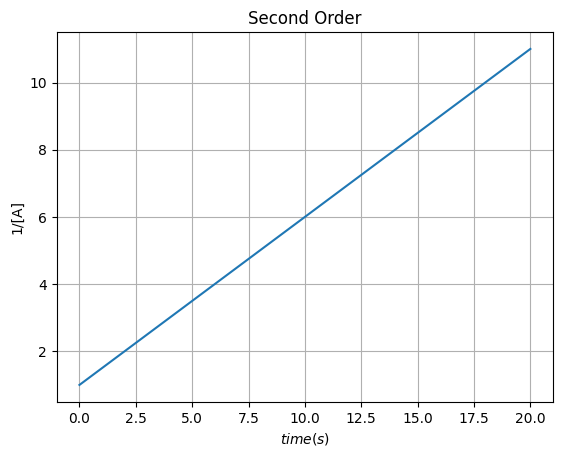

In [254]:
#constants
A0=1
k=0.5

t = np.linspace(0,20)
c_A = (A0)/((k*t*A0)+1)

plt.plot(t, 1/c_A); plt.title("Second Order"); plt.xlabel("$time(s)$"); plt.ylabel("1/[A]")
plt.grid()
plt.show()


#### As k has a direct relationship with the slope. When A0 equals zero, the function ceases to exist. A0 increases as you approach zero from the positive side and increases when you move away from zero on the negative side.

### d)

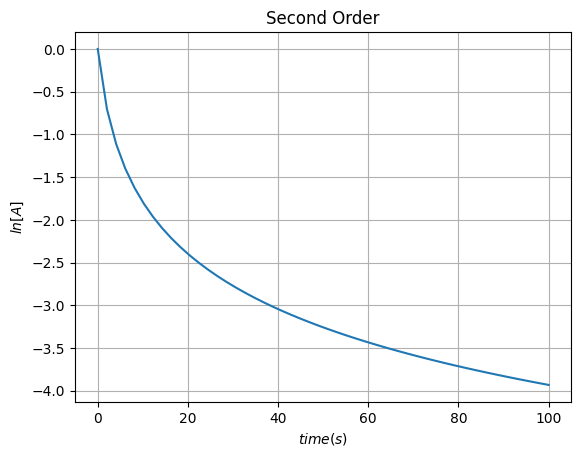

In [255]:
#constants
A0=1
k=0.5

t = np.linspace(0,100)
c_A = (A0)/((k*t*A0)+1)

plt.plot(t, np.log(c_A)); plt.title("Second Order"); plt.xlabel("$time(s)$"); plt.ylabel("$ln[A]$")
plt.grid()
plt.show()

#### The function looks like a negative exponential raised to the negative x.

## A3: Determining the rate law order from measured data
### a)

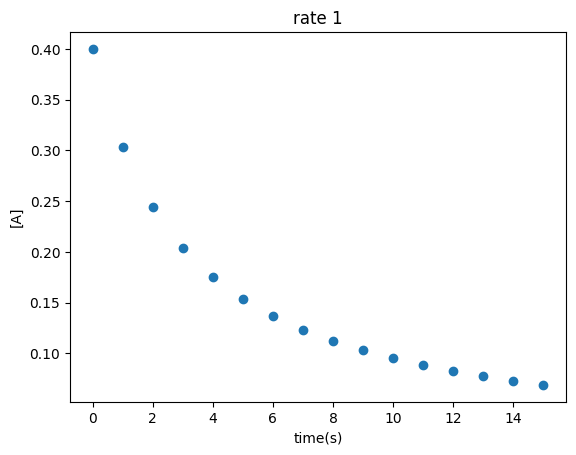

In [256]:
rate1 = np.loadtxt("rate1.dat"); rate1 = np.transpose(rate1)
plt.scatter(rate1[0], rate1[1]), plt.xlabel("time(s)"); plt.ylabel("[A]");
plt.title("rate 1"); plt.show()

### b)

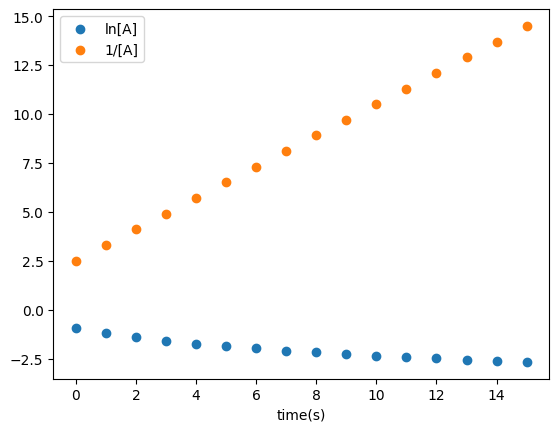

In [257]:
plt.scatter(rate1[0], np.log(rate1[1]), label="ln[A]"); plt.xlabel("time(s)")
plt.scatter(rate1[0], 1/rate1[1], label="1/[A]")
plt.legend()

#### The rate law for this data is second order.

### c)

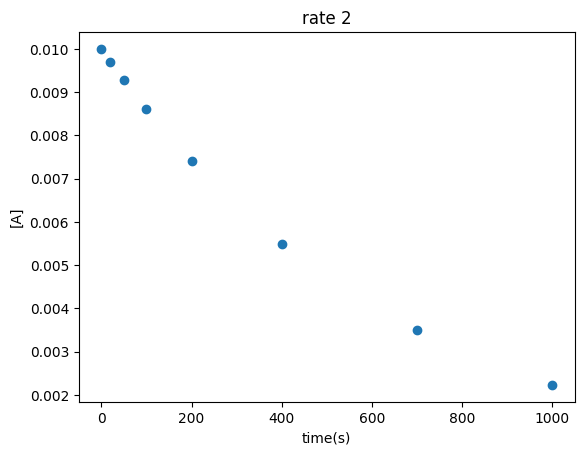

In [258]:
rate2 = np.loadtxt("rate2.dat"); rate2 = np.transpose(rate2)
plt.scatter(rate2[0], rate2[1]), plt.xlabel("time(s)"); plt.ylabel("[A]");
plt.title("rate 2"); plt.show()

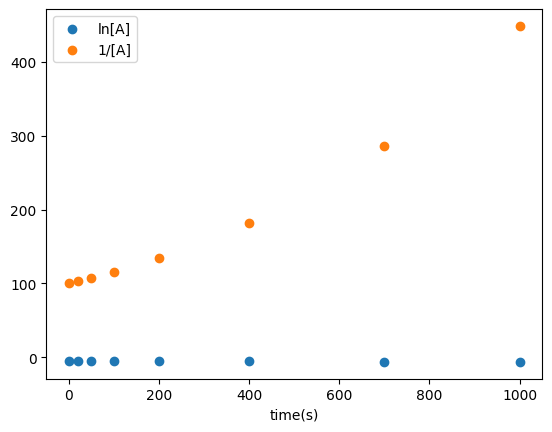

In [259]:
plt.scatter(rate2[0], np.log(rate2[1]), label="ln[A]"); plt.xlabel("time(s)")
plt.scatter(rate2[0], 1/rate2[1], label="1/[A]")
plt.legend()

#### The data in rate 2 corresponds to first order rate law.

### d)

rate 1
 slope:  0.7999998749479524 
 y-intercept:  2.4999973380976757
rate 2
 slope:  -0.0015003603931649412 
 y-intercept:  -4.6050164960252165


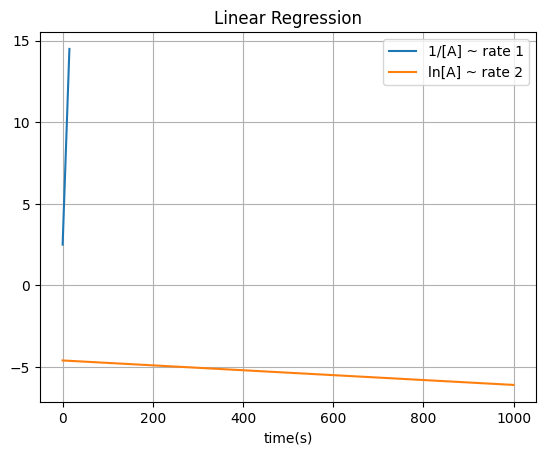

In [260]:
#for rate 1
x = rate1[0].reshape(-1, 1); y = 1/(rate1[1])
model = LinearRegression()
model.fit(x,y)
y_predicted = model.predict(x)
slope = model.coef_[0]
y_intercept = model.intercept_
print("rate 1\n slope: ", slope, "\n y-intercept: ", y_intercept)
plt.plot(x,y_predicted, label="1/[A] ~ rate 1");

#for rate 2
x = rate2[0].reshape(-1, 1); y = np.log(rate2[1])
model = LinearRegression()
model.fit(x,y)
y_predicted = model.predict(x)
slope = model.coef_[0]
y_intercept = model.intercept_
print("rate 2\n slope: ", slope, "\n y-intercept: ", y_intercept)
plt.plot(x,y_predicted, label="ln[A] ~ rate 2");
plt.title("Linear Regression");plt.xlabel("time(s)");plt.legend();plt.grid();plt.show()

### e)
#### The rate constant corresponding to the data in 'rate2.dat' file is -0.0015.
### f)

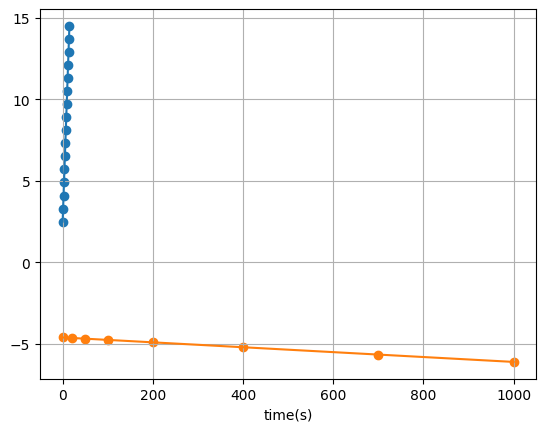

In [261]:
#for rate 1
x = rate1[0].reshape(-1, 1); y = 1/(rate1[1])
model = LinearRegression()
model.fit(x,y)
y_predicted = model.predict(x)
slope = model.coef_[0]
y_intercept = model.intercept_
plt.plot(x,y_predicted, label="1/[A] ~ rate 1");
plt.scatter(rate1[0], 1/(rate1[1]), label="1/[A] ~ rate 1")

#for rate 2
x = rate2[0].reshape(-1, 1); y = np.log(rate2[1])
model = LinearRegression()
model.fit(x,y)
y_predicted = model.predict(x)
slope = model.coef_[0]
y_intercept = model.intercept_
plt.plot(x,y_predicted, label="ln[A] ~ rate 2");
plt.scatter(rate2[0], np.log(rate2[1]), label="ln[A] ~ rate 2")
plt.grid();plt.xlabel("time(s)");plt.show()

## Part B: Analytical Integration of Rate Laws
## B1: First order reactions

## B2: Higher order reactions with one reactant
### Reaction: $3A \rightarrow X$

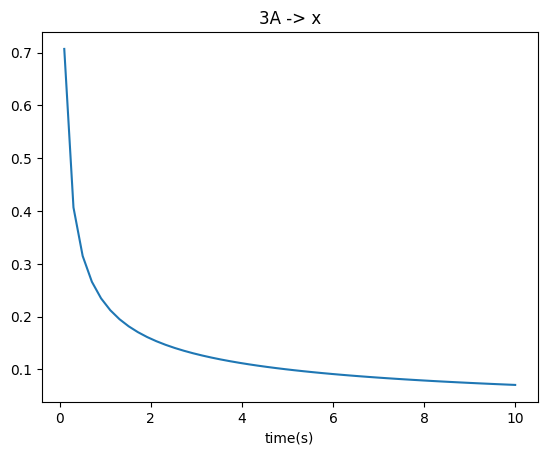

In [262]:
t = np.linspace(0.1,10)
k=10
c_A = 1/np.sqrt(2*k*t)
plt.title("3A -> x");plt.xlabel("time(s)");plt.plot(t, c_A);plt.show()

## B3: Second order reactions with two reactants
### $A + B \rightarrow X$
### a)

In [263]:
#variables and constants
t, k, A0, B0 = symbols('t k A0 B0')
A = Function("A")(t)

#write the equation we are trying to solve
equation = Eq(-diff(A,t), k*A*(B0 - A0 + A))
solution = dsolve(equation)
solution
#solution = solution.rhs
#solution

Eq(A(t), (A0 - B0)*exp(A0*(C1 + k*t))/(exp(A0*(C1 + k*t)) - exp(B0*(C1 + k*t))))

### b)

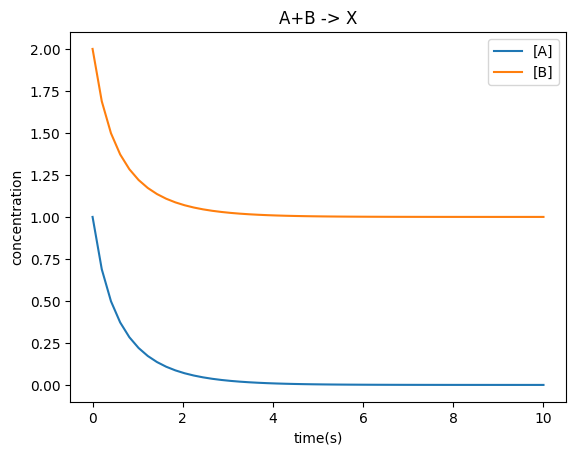

In [264]:
time = np.linspace(0,10)
k=1
A0=1
B0=A0*2
C1=np.log(2)

# Making a function out of the analytical solution we just got.
def c_A(t, k, A0, B0, C1):
    return (A0 - B0)*np.exp(A0*(C1 + k*t))/(np.exp(A0*(C1 + k*t)) - np.exp(B0*(C1 + k*t)))

def c_B(t, k, A0, B0, C1):
    A = c_A(t, k, A0, B0, C1)
    return B0 - A0 + A

plt.plot(time, c_A(time, k, A0, B0, C1), label="[A]")
plt.plot(time, c_B(time, k, A0, B0, C1), label="[B]")
plt.title("A+B -> X");plt.xlabel("time(s)");plt.ylabel("concentration");plt.legend();plt.show()

#### $A_0$ cannot equal $B_0$ because if they did, then the denominator in the equation for A(t) would equal zero.

### B4: Reversible first order reactions

In [265]:
t, kb, kf, A0, C0 = symbols('t k_b k_f A0 C0')
A = Function("A")(t)

equation = Eq(diff(A,t), (kb*(C0 + A0 - A)) - (kf*A))
solution = dsolve(equation)
solution

Eq(A(t), A0*k_b/(k_b + k_f) + C0*k_b/(k_b + k_f) + C1*exp(-t*(k_b + k_f)))

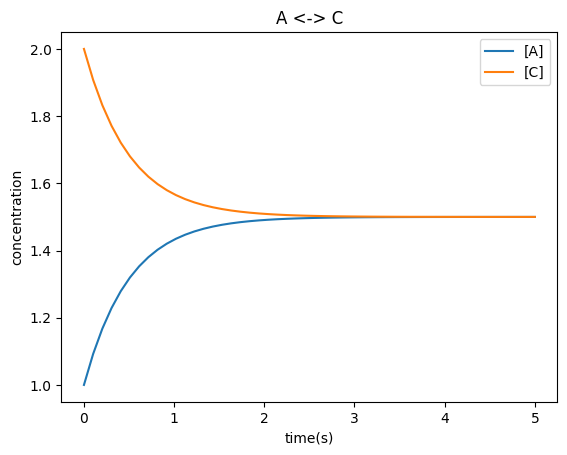

In [266]:
t = linspace(0,5)
kb = 1
kf = 1
A0 = 1
C0 = A0*2
C1 = A0 - (A0*kb)/(kb+kf) - (C0*kb)/(kb+kf)

def c_A(t, k_b, k_f, A0, C0, C1):
    return A0*k_b/(k_b + k_f) + C0*k_b/(k_b + k_f) + C1*np.exp(-t*(k_b + k_f))


def c_C(C0, A0, A):
    return C0 + A0 - A

concentration_A = c_A(t, kb, kf, A0, C0, C1)    
concentration_C = c_C(C0, A0, concentration_A)

plt.plot(t, concentration_A, label="[A]")
plt.plot(t, concentration_C, label="[C]")
plt.title("A <-> C");plt.xlabel("time(s)");plt.ylabel("concentration");plt.legend();plt.show()

#### $k_{eq}$ = 1.5. In terms of the 2 rate constants, $k_{eq}$ can be expressed as: $\frac{k_{f}}{k_{b}}$
## B5: Sequential reactions without back-reactions
### $A → B$ with rate constant $k_1$
### $B → C$ with rate constant $k_2$
### a) and b)

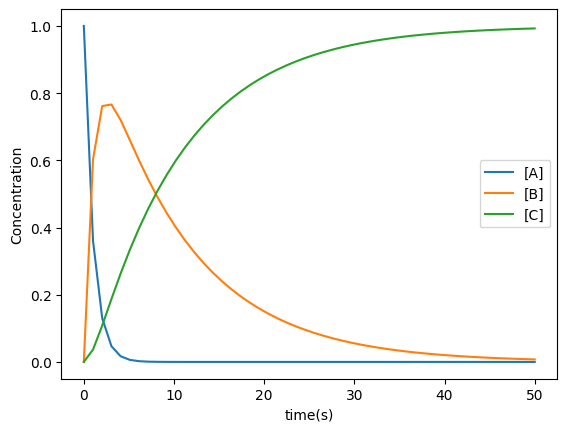

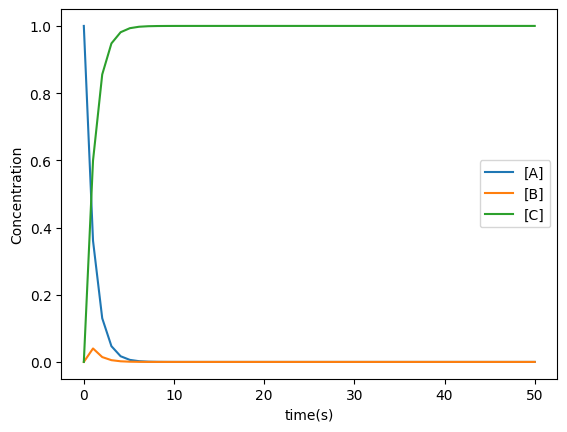

In [267]:
#Constants
A0=1
B0=0
C0=0
k1=1
k2=0.1
C1_A = A0
C1_C = 0
t = linspace(0, 50)

#defining our concentrations derived from rate laws.
def c_A(k_1, t, C1):
    return C1 * np.exp(-k1*t)

def c_B(k_1, k_2, t, A0):
     return ((k_1*A0) / (k_2-k_1)) * (np.exp(-k_1*t) - np.exp(-k_2*t))
    
def c_C(k_1 , k_2, A0, t):
    return C1_A - c_A(k1, t, C1_A) - c_B(k1, k2, t, C1_A)
    
A = c_A(k1, t, C1_A)
B = c_B(k1, k2, t, C1_A)
C = c_C(k1, k2, A0, t)

plt.plot(t, A, label="[A]")
plt.plot(t, B, label="[B]")
plt.plot(t, C, label="[C]")
plt.xlabel("time(s)");plt.ylabel("Concentration");plt.legend();plt.show()

k2 = 10
A = c_A(k1, t, C1_A)
B = c_B(k1, k2, t, C1_A)
C = c_C(k1, k2, A0, t)

plt.plot(t, A, label="[A]")
plt.plot(t, B, label="[B]")
plt.plot(t, C, label="[C]")
plt.xlabel("time(s)");plt.ylabel("Concentration");plt.legend();plt.show()


#### The following statement must be true if it follows the data: k1 > k2.

## B6: Sequential reactions with back-reactions
### a)

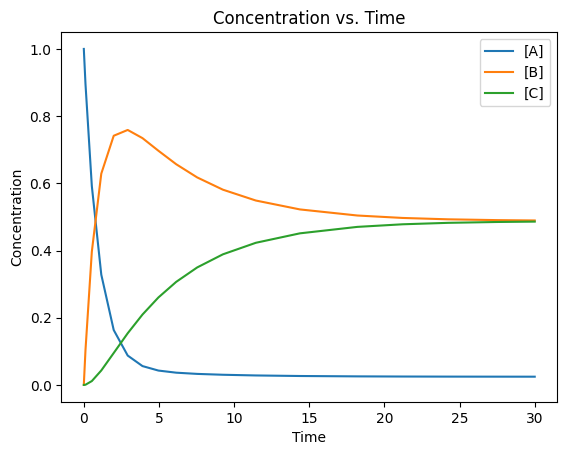

In [268]:
#constants
k1 = 1
k2 = 0.1
kn_1 = 0.05
kn_2 = 0.1
A0 = 1
B0 = C0 = 0
t = linspace(0,30)

def sequential_reactions(t, y, k1, k_1, k2, k_2):
    A, B, C = y
    dA_dt = -k1*A + k_1*B
    dB_dt = k1*A - k_1*B - k2*B + k_2*C
    dC_dt = k2*B - k_2*C
    return [dA_dt, dB_dt, dC_dt]

#Solving for system of ODEs
solution_1 = solve_ivp(sequential_reactions, [0, 30], [A0, B0, C0], args=(k1, kn_1, k2, kn_2))

plt.plot(solution_1.t, solution_1.y[0], label='[A]')
plt.plot(solution_1.t, solution_1.y[1], label='[B]')
plt.plot(solution_1.t, solution_1.y[2], label='[C]')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.title('Concentration vs. Time')
plt.show()

### b)
### The time it took to reach equilibrium with back reactions was faster than without back reactions. The concentration of A reaches zero for both, but the concentration of B increases to 0.5 with back reactions to even out with the concentration of C. Without back reactions, everything converged to C.

#### Compared to B5, the reaction reaches equilibrium faster and both B and C have the same amount of concentrations.

### c)

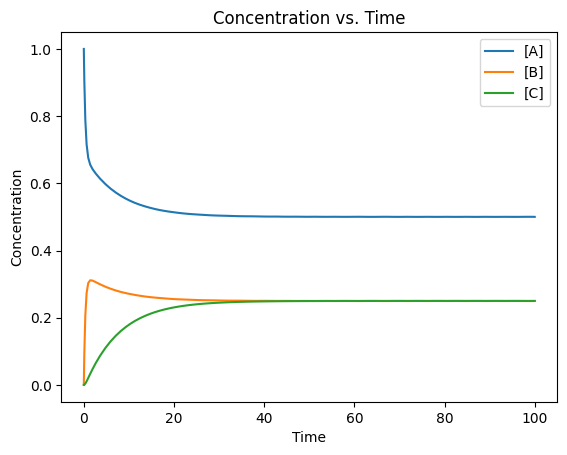

In [269]:
#constants
k1 = 1
k2 = 0.1
kn_1 = 2.0
kn_2 = 0.1
A0 = 1
B0 = C0 = 0
t = linspace(0,100)

def sequential_reactions(t, y, k1, k_1, k2, k_2):
    A, B, C = y
    dA_dt = -k1*A + k_1*B
    dB_dt = k1*A - k_1*B - k2*B + k_2*C
    dC_dt = k2*B - k_2*C
    return [dA_dt, dB_dt, dC_dt]

#Solving for system of ODEs
solution_2 = solve_ivp(sequential_reactions, [0, 100], [A0, B0, C0], args=(k1, kn_1, k2, kn_2))

plt.plot(solution_2.t, solution_2.y[0], label='[A]')
plt.plot(solution_2.t, solution_2.y[1], label='[B]')
plt.plot(solution_2.t, solution_2.y[2], label='[C]')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.title('Concentration vs. Time')
plt.show()

#### The larger the $k_{-1}$ value, the lower the concentration of B being made.

## B7: The steady state approximation

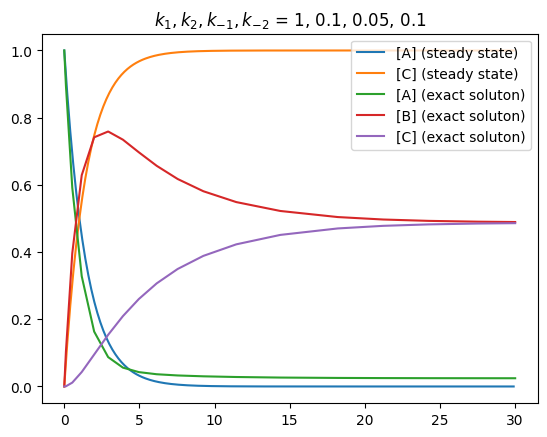

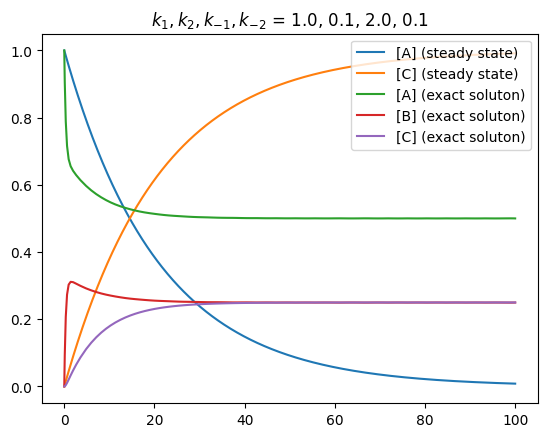

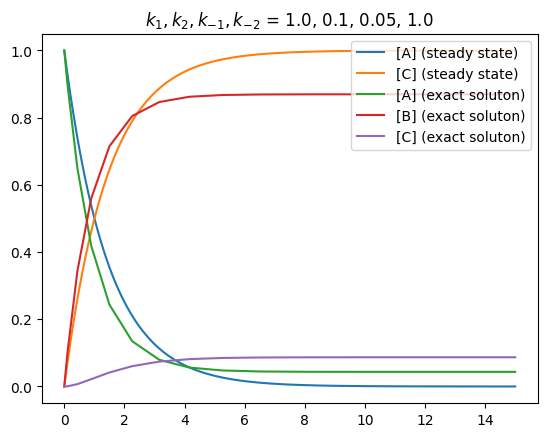

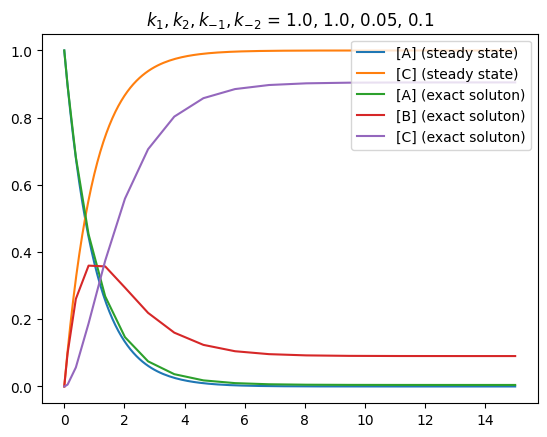

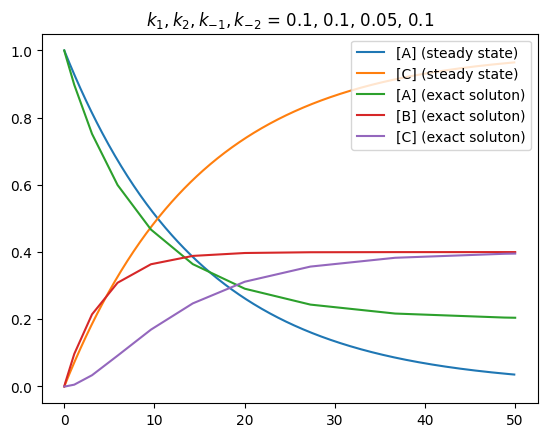

In [270]:
def Euler_Method(k1 = 1, k2 = 0.1, kn_1 = 0.05, kn_2 = 0.1, max_time = 30, h = 0.1):
    t = np.array([0.0])
    A = np.array([1.0])
    C = np.array([0.0])
    
    while t[-1] < max_time-h:
        A1 = -k1 + ((kn_1*k1)/(kn_1+k2)) 
        A2 = (kn_1*kn_2)/(kn_1+k2)
        C1 = (k2*k1)/(kn_1+k2)
        C2 = ((k2*kn_2)/(kn_1+k2)) - kn_2
        c_matrix = np.array([[A1, A2], [C1, C2]]) #coefficient matrix
        x = np.array([A[-1], C[-1]]) #concentrations at t_i
        dt = c_matrix*x
        dt = dt.T
        dt = dt[0]
        
        A_new = A[-1] + h*dt[0]
        C_new = C[-1] + h*dt[1]
        t_new = t[-1] + h
        
        A = np.append(A, A_new)
        C = np.append(C, C_new)
        t = np.append(t, t_new)
    
    return t, A, C

#for part B6 a)
k1 = 1; k2 = 0.1; kn_1 = 0.05; kn_2 = 0.1; max_time = 30; h = 0.1
t, A, C = Euler_Method()
plt.plot(t, A, label="[A] (steady state)")
plt.plot(t, C, label="[C] (steady state)")
plt.plot(solution_1.t, solution_1.y[0], label='[A] (exact soluton)')
plt.plot(solution_1.t, solution_1.y[1], label='[B] (exact soluton)')
plt.plot(solution_1.t, solution_1.y[2], label='[C] (exact soluton)')
plt.title("$k_1, k_2, k_{-1}, k_{-2}$ = " + str(k1) + ", " + str(k2) + ", " + str(kn_1) + ", " + str(kn_2));plt.legend(loc="upper right");plt.show()

#for part B6 b)
k1 = 1.0; k2 = 0.1; kn_1 = 2.0; kn_2 = 0.1; max_time = 100; h = 0.1
t, A, C = Euler_Method(k1, k2, kn_1, kn_2, max_time, h)
plt.plot(t, A, label="[A] (steady state)")
plt.plot(t, C, label="[C] (steady state)")
plt.plot(solution_2.t, solution_2.y[0], label='[A] (exact soluton)')
plt.plot(solution_2.t, solution_2.y[1], label='[B] (exact soluton)')
plt.plot(solution_2.t, solution_2.y[2], label='[C] (exact soluton)')
plt.title("$k_1, k_2, k_{-1}, k_{-2}$ = " + str(k1) + ", " + str(k2) + ", " + str(kn_1) + ", " + str(kn_2));plt.legend(loc="upper right");plt.show()

#trying some other rate constant values
k1 = 1.0; k2 = 0.1; kn_1 = 0.05; kn_2 = 1.0; max_time = 15; h = 0.1
solution_3 = solve_ivp(sequential_reactions, [0, max_time], [A0, B0, C0], args=(k1, kn_1, k2, kn_2))
t, A, C = Euler_Method(k1, k2, kn_1, kn_2, max_time, h)
plt.plot(t, A, label="[A] (steady state)")
plt.plot(t, C, label="[C] (steady state)")
plt.plot(solution_3.t, solution_3.y[0], label='[A] (exact soluton)')
plt.plot(solution_3.t, solution_3.y[1], label='[B] (exact soluton)')
plt.plot(solution_3.t, solution_3.y[2], label='[C] (exact soluton)')
plt.title("$k_1, k_2, k_{-1}, k_{-2}$ = " + str(k1) + ", " + str(k2) + ", " + str(kn_1) + ", " + str(kn_2));plt.legend(loc="upper right");plt.show()

k1 = 1.0; k2 = 1.0; kn_1 = 0.05; kn_2 = 0.1; max_time = 15; h = 0.1
solution_4 = solve_ivp(sequential_reactions, [0, max_time], [A0, B0, C0], args=(k1, kn_1, k2, kn_2))
t, A, C = Euler_Method(k1, k2, kn_1, kn_2, max_time, h)
plt.plot(t, A, label="[A] (steady state)")
plt.plot(t, C, label="[C] (steady state)")
plt.plot(solution_4.t, solution_4.y[0], label='[A] (exact soluton)')
plt.plot(solution_4.t, solution_4.y[1], label='[B] (exact soluton)')
plt.plot(solution_4.t, solution_4.y[2], label='[C] (exact soluton)')
plt.title("$k_1, k_2, k_{-1}, k_{-2}$ = " + str(k1) + ", " + str(k2) + ", " + str(kn_1) + ", " + str(kn_2));plt.legend(loc="upper right");plt.show()

k1 = 0.1; k2 = 0.1; kn_1 = 0.05; kn_2 = 0.1; max_time = 50; h = 0.1
solution_4 = solve_ivp(sequential_reactions, [0, max_time], [A0, B0, C0], args=(k1, kn_1, k2, kn_2))
t, A, C = Euler_Method(k1, k2, kn_1, kn_2, max_time, h)
plt.plot(t, A, label="[A] (steady state)")
plt.plot(t, C, label="[C] (steady state)")
plt.plot(solution_4.t, solution_4.y[0], label='[A] (exact soluton)')
plt.plot(solution_4.t, solution_4.y[1], label='[B] (exact soluton)')
plt.plot(solution_4.t, solution_4.y[2], label='[C] (exact soluton)')
plt.title("$k_1, k_2, k_{-1}, k_{-2}$ = " + str(k1) + ", " + str(k2) + ", " + str(kn_1) + ", " + str(kn_2));plt.legend(loc="upper right");plt.show()

## Part C: Numerical Solution of Rate Equations
## C1: Solution using a numerical solver
### a)

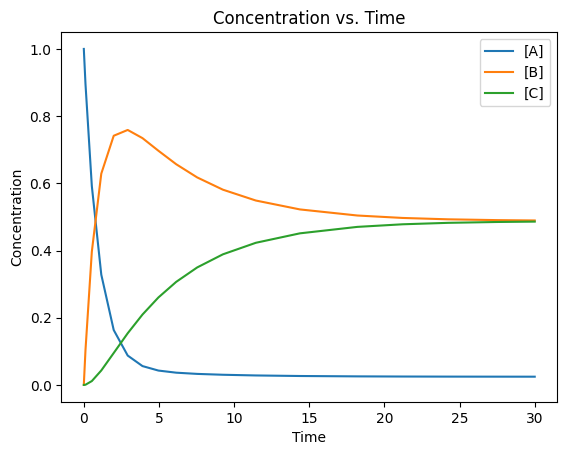

In [271]:
#constants
k1 = 1.0
k2 = 0.1
kn_1 = 0.05
kn_2 = 0.1
A0 = 1
B0 = C0 = 0
t = linspace(0,100)

def sequential_reactions(t, y, k1, k_1, k2, k_2):
    A, B, C = y
    dA_dt = -k1*A + k_1*B
    dB_dt = k1*A - k_1*B - k2*B + k_2*C
    dC_dt = k2*B - k_2*C
    return [dA_dt, dB_dt, dC_dt]

#Solving for system of ODEs
solution = solve_ivp(sequential_reactions, [0, 30], [A0, B0, C0], args=(k1, kn_1, k2, kn_2))

plt.plot(solution.t, solution.y[0], label='[A]')
plt.plot(solution.t, solution.y[1], label='[B]')
plt.plot(solution.t, solution.y[2], label='[C]')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.title('Concentration vs. Time')
plt.show()

## C2: Solution using Euler’s Method; a simple first order reaction
### a)

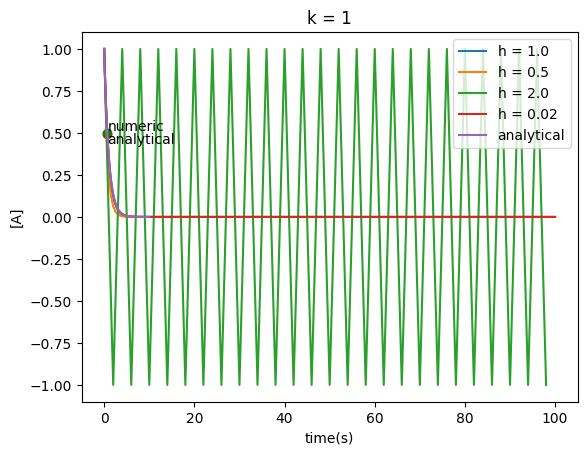

In [272]:
def Euler_Method_for_C2(k = 1, max_time = 100, h = 0.1):
    t = np.array([0.0])
    A = np.array([1.0]) #A0
    
    while t[-1] < max_time-h:
        dt = -k*A[-1]

        A_new = A[-1] + h*dt
        t_new = t[-1] + h
        
        A = np.append(A, A_new)
        t = np.append(t, t_new)
    
    return t, A

k = 0.05
A0 = 1.0
h = 1.0
max_time = 100
t, A_h_0 = Euler_Method_for_C2()
plt.plot(t, A_h_0, label="h = 1.0")
t, A_h_1 = Euler_Method_for_C2(h = 0.5)
plt.plot(t, A_h_1, label="h = 0.5")
t, A_h_2 = Euler_Method_for_C2(h = 2.0)
plt.plot(t, A_h_2, label="h = 2.0")
t, A_h_3 = Euler_Method_for_C2(h = 0.02)
plt.plot(t, A_h_3, label="h = 0.02")

A0=1
k=[1]
plot = first_rate_law(A0, k[0])
plt.xlabel("time(s)");plt.ylabel("[A]");plt.legend();plt.show()

#### Your step size (h) has to be less than or equal to one in order to keep error within 0.001. We can also see that the analytical and numerical solutions are very similar.

## C3: Sequential first order reactions with no back-reactions

In [ ]:
def Euler_Method_for_C3_B(k1 = 1, k2 = 0.2, max_time = 100, h = 0.1):
    t = np.array([0.0])
    A = np.array([1.0]) #A0
    B = np.array([0.0]) #B0
    
    while t[-1] < max_time-h:
        dt_1 = -k1*A[-1]
        dt_2 = k1*A[-1] - k2*B[-1]
        
        A_new = A[-1] + h*dt_1
        B_new = B[-1] + h*dt_2
        t_new = t[-1] + h

        A = np.append(A, A_new)
        B = np.append(B, B_new)
        t = np.append(t, t_new)
    
    return t, B

def Euler_Method_for_C3_C(B, k = 0.5, max_time = 100, h = 0.1):
    t = np.array([0.0])
    C = np.array([0.0]) #C0
    B = np.array(B)
    print(B.size)
    
    for i in range(min(100, B.size)):
        dt_1 = k*B[i]
        C_new = B[i] + h*dt_1
        t_new = t[-1] + h

        C = np.append(C, C_new)
        t = np.append(t, t_new)
    
    return t, C

t1, A = Euler_Method_for_C2()
t2, B = Euler_Method_for_C3_B()
t3, C = Euler_Method_for_C3_C(B)
plt.plot(t1,A);plt.plot(t2,B);plt.plot(t3,C)

## C4: Solution using Euler’s Method; sequential reversible reactions
#### I did this in part B7.